<h1 align = "center">House Price Prediction</h1>

---

**Objective:** [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques) is a free to use dataset provided in Kaggle. I'd previously used this dataset, however the results were poor. Let's see if my skills have increased! The notebook will serve to provide data analysis without any prior knowledge on the data. In this notebbok, let's discuss the following things:
 * **Understand the Dataset/Problem:** The given dataset has about `79` features, lets analyze each feature one by one and understand their practical impact.

In [11]:
# show current code version
# use https://semver.org/
# this file is kept to keep track of individual
# project/competitions progress in check
# the actual tag is represented as: <PROJECT_CODE>:<version>
open("VERSION", 'rt').read() # bump codecov

'development #semver-2.0.0'

## Code Imports

**PEP8 Style Guide** lists out the following *guidelines* for imports:
 1. Imports should be on separate lines,
 2. Import order should be:
    * standard library/modules,
    * related third party imports,
    * local application/user defined imports
 3. Wildcard import (`*`) should be avoided, else specifically tagged with **`# noqa: F403`** as per `flake8`
 4. Avoid using relative imports; use explicit imports instead.
 
For more details, visit [here](https://peps.python.org/pep-0008/#imports) for more information. Note, that actual `flake8` file is currently missing from the template, and will be later added if required. In addition, `logging` module is imported and configured.

[**`logging`**](https://docs.python.org/3/howto/logging.html) is a standard python module that is meant for tracking any events that happen during any software/code operations. This module is super powerful and helpful for code debugging and other purposes. The next section defines a `logging` configuration in **`/logs/`** directory. Each project is separated as `<PROJECT_CODE>/<VERSION>/<DATE>.log` file. The directory is automatically created, if not available. Use logging operations like:

```python
 >> logging.debug("This is a Debug Message.")
 >> logging.info("This is a Information Message.")
 >> logging.warning("This is a Warning Message.")
 >> logging.error("This is a ERROR Message.")
 >> logging.critical("This is a CRITICAL Message.")
```

In [1]:
import random

In [2]:
import logging # configure logging on `global arguments` section

In [3]:
from time import ctime # will be used in logging, file/output directory create etc.
from os import makedirs # create directories dynamically, if not already done so manually
from os.path import join # keep directories `os`-independent
from copy import deepcopy # `pd.Dataframe` is mutable, so any `df` operation may need `deepcopy`
from tqdm import tqdm as TQ # provide progress bar for code completions
from uuid import uuid1 as UUID # keep output file name unique
from datetime import datetime as dt # formatting datetime objects

In [58]:
from typing import Iterable

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline
sns.set_style('whitegrid');
plt.style.use('default-style');
np.set_printoptions(precision = 3, threshold = 15)

## Define Global Arguments

In [5]:
# a single project can have multiple sub-projects and/or output
# generally, each sub-project has it's own `notebook` and code files
# use the `PROJECT_CODE` tag to create a directory of the format
# <execution date>/<PROJECT_CODE> thus giving an unique identity for
# each run of code. Once defined, keep this code same throughout.
# this code can also be used for keeping track on progress per
# sub-project level.
PROJECT_CODE = "House Price Prediction (data analysis)"

In [6]:
ROOT = "." # current directory
DATA = join(ROOT, "data")

In [7]:
# define output directory
# this is defined on current date
# `today` is so configured that it permits windows/*.nix file/directory names
today = dt.strftime(dt.strptime(ctime(), "%a %b %d %H:%M:%S %Y"), "%a, %b %d %Y")

print(f"Code Execution Started on: {today}") # only date

Code Execution Started on: Fri, Apr 08 2022


In [8]:
OUTPUT_DIR = join(ROOT, "output", today, PROJECT_CODE)
makedirs(OUTPUT_DIR, exist_ok = True) # create dir if not exist

# also create directory for `logs`
LOGS_DIR = join("/", "logs", PROJECT_CODE, open("VERSION", 'rt').read())
makedirs(LOGS_DIR, exist_ok = True)

In [9]:
logging.basicConfig(
    filename = join(LOGS_DIR, f"{today}.log"), # change `reports` file name
    filemode = "a", # append logs to existing file, if file exists
    format = "%(asctime)s - %(name)s - CLASS:%(levelname)s:%(levelno)s:L#%(lineno)d - %(message)s",
    level = logging.DEBUG
)

In [10]:
# set/change output file name
OUTPUT_FILE = f"{UUID()}.xlsx" # randomly generate names

# log/inform users of current output file name
logging.info(f"Output File : {join(OUTPUT_DIR, OUTPUT_FILE)}")
print(f"Output File : {join(OUTPUT_DIR, OUTPUT_FILE)}") # use this syntax

Output File : .\output\Fri, Apr 08 2022\House Price Prediction (data analysis)\c3c7b46d-b700-11ec-b870-5405db104a4e.xlsx


In [11]:
INPUT_FILENAME = join(DATA, "train.csv") # let's start with `training` dataset

## Read & Process Input File(s)

In [12]:
def read_file(filename : str) -> pd.DataFrame:
    """
    Read a CSV File using `pd.read_csv()`
    
    The function is intended to read the given `training` and `testing` file,
    for the given project. Since we're dealing with the same type file for
    both the use case, the same function can be used to read and process both
    the training and testing file.
    
    :param filename: Input file name. Generally, this is either `train.csv` or
                     `test.csv` along with total (absolute/relative) path.
    """
    
    data = pd.read_csv(filename, index_col = 0)
    return data.copy() # deepcopy

### Understand the Dataset/Problem

The **objective** is to predict the **`SalePrice`** given various attributes that describes (almost) every aspect of residential homes in Ames, Iowa. In order to understand our data, let's look into each of the categories, and understand their relevance in comparison to the given problem. But, first let's check the distribution of `SalePrice`.

In [91]:
data = read_file(INPUT_FILENAME)

logging.info(f"{INPUT_FILENAME} Read using `read_file()`")
data.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
644,60,RL,80.0,10793,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,4,2007,WD,Normal,152000
1408,20,RL,NaN,8780,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,112000
1366,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,216000
754,60,RL,80.0,10240,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,275500
1117,80,RL,NaN,7750,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,184100


#### Distribution of `SalePrice`

Obviously, the best way to get statistical information from a column is just by `df.column.describe()`, but let's make a good visual representation and plot everything with `seaborn`.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


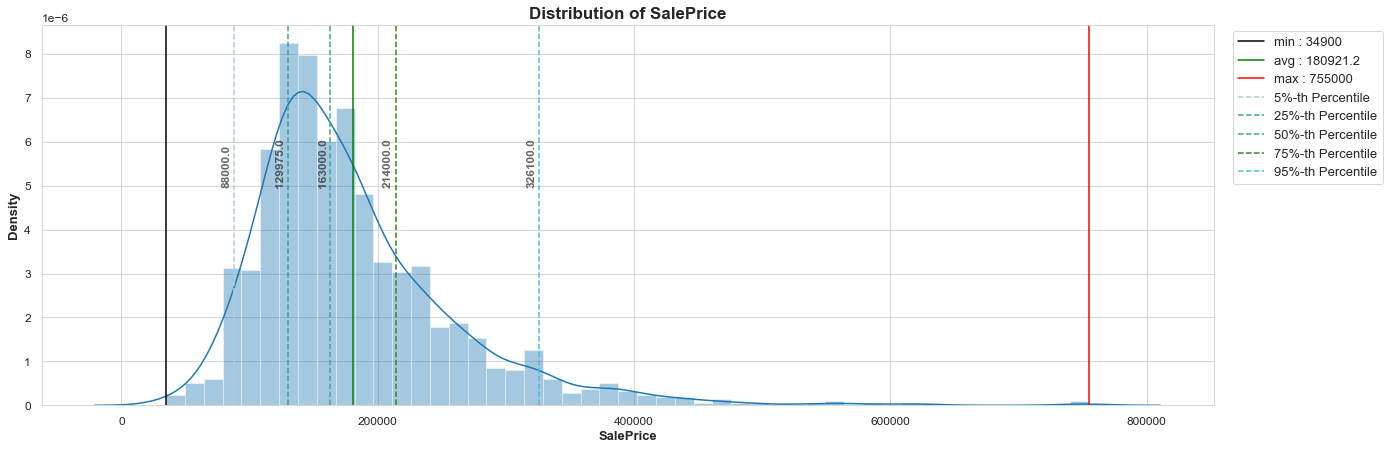

In [61]:
# ignore FutureWarning `displot`
# if `seaborn` is updated > '0.11.2'
# use `sns.displot` instead
# sns.displot(data.SalePrice)

sns.distplot(data.SalePrice)

# add `axvline` to denote span of the graph
# using `for` loop to reduce code duplicacy
for v, c, label in zip(
        [data.SalePrice.min(), data.SalePrice.mean(), data.SalePrice.max()], # v : x-value
        ['k', 'g', 'r'], # c : color
        ['min', 'avg', 'max'] # label : for legend
    ):
    plt.axvline(v, c = c, label = f"{label} : {round(v, 2)}")
    
# similarly, let's add percentile lines
for q in [5, 25, 50, 75, 95]:
    # q = percentile ∈ [0, 100]
    # check `np.percentile` for more
    color = "#" + "%06x" % random.randint(0, 0xFFFFFF) # randomly generate
    percentile = np.percentile(data.SalePrice, q)
    
    plt.text(percentile - 1e4, 5e-6, str(round(percentile, 3)), rotation = 'vertical', fontweight = 'bold', alpha = 0.7)
    plt.axvline(percentile, c = color, ls = "--", label = f"{q}%-th Percentile")

plt.title("Distribution of SalePrice")
plt.legend(loc = "upper right", bbox_to_anchor=(1.15, 1))
plt.show()

In statistics, **Normal Distribution** of data has many advantage while dealing with a *machine learning* problem. The advantage of normal distribution is explained in [Miami University Library](#mm-lib), and mathematically the distribution is formulated as:

$$
    f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}(\frac{x - \mu}{\sigma})^2}
$$

where, $f(x)$ is the probability density function, with a standard deviation of $\sigma$ and a mean of $\mu$.

Well, our `SalePrice` does not however follow the *normal distribution* as seen above. To understand this type of distribution we may look into `skewness` and `kurtosis`. As explained in [this article](#itl-nist-gov) - *skewness* is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. While, *kurtosis* is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

In [64]:
print(f"Skewness: {round(data.SalePrice.skew(), 6)}")
print(f"Kurtosis: {round(data.SalePrice.kurt(), 6)}")

Skewness: 1.882876
Kurtosis: 6.536282


#### Visualizing `NaN` Values

Missing data (i.e. `NaN` or `null`) values always poses a serious challenge in a machine learning problem. Often times, a suitable method can greatly increase model performance just by analysis of missing data. In this context, we need to understand the following:
 * How much data is missing (for a particular feature)?
 * Is the missing data random, or can any underlying *pattern* be used to treat them?
 
Understanding the two, and proper treatment can greatly impact the model. So, before that, let's find the percentage of missing data for each feature in the dataset (from largest to smallest) using `pandas` method. Let's also visualize the missing value with `sns.heatmap` just to know how _"messy"_ the data is.

In [92]:
missing_data_percentage = pd.concat([
    data.isnull().sum().sort_values(ascending=False), # total num of null records
    (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False), # percentage of null records
], axis = 1, keys = ["Total #Null-Records", "% of NaN Values"])

missing_data_percentage["% of NaN Values"] *= 100 # in `100%` range
missing_data_percentage = missing_data_percentage[missing_data_percentage["% of NaN Values"] != 0]

# also append `dtype` of each missing/null columns
missing_data_percentage = missing_data_percentage.merge(pd.DataFrame(data.dtypes), left_index = True, right_index = True, how = "left")
missing_data_percentage.rename(columns = {0 : "dtype"}, inplace = True)

print(f"Data Shape: {data.shape}")
missing_data_percentage # get only the columns which have certain null values

Data Shape: (1460, 80)


,Total #Null-Records,% of NaN Values,dtype
PoolQC,1453,99.520548,object
MiscFeature,1406,96.301370,object
Alley,1369,93.767123,object
Fence,1179,80.753425,object
FireplaceQu,690,47.260274,object
LotFrontage,259,17.739726,float64
GarageYrBlt,81,5.547945,float64
GarageCond,81,5.547945,object
GarageType,81,5.547945,object
GarageFinish,81,5.547945,object


Okay, so let's set a threshold of `18%` and discard all the features which has `count(NaN)` Values $\geq$ 18%. Setting the threshold also ensures that all the removed features are of type `object` i.e. they are categorical variables. Thus the following features are removed:

In [93]:
discarded_features = missing_data_percentage[missing_data_percentage["% of NaN Values"] >= 18].index
discarded_features

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], dtype='object')

In [94]:
data = data[[c for c in data.columns if c not in discarded_features]]
data.shape

(1460, 75)

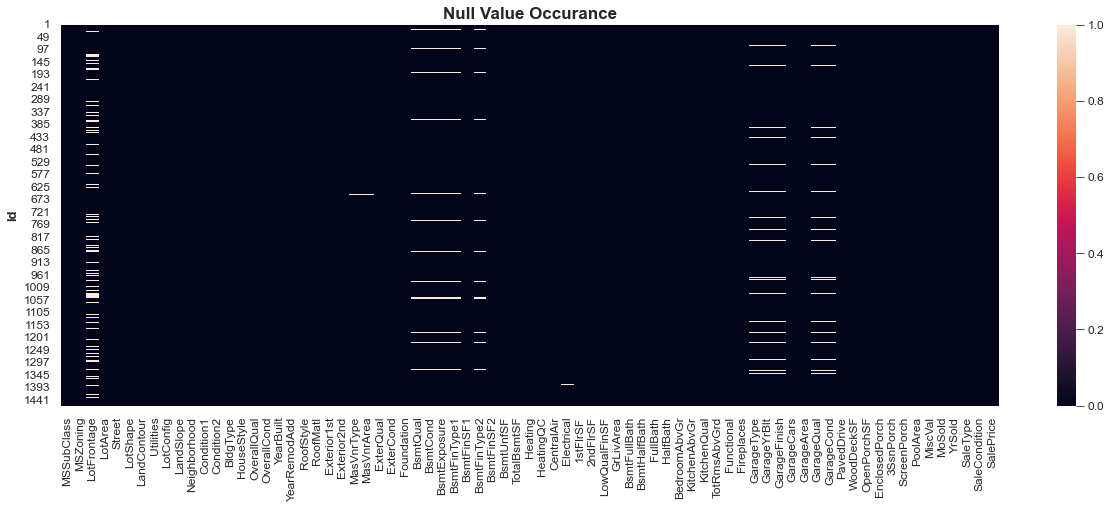

In [109]:
sns.heatmap(data.isnull())

plt.title("Null Value Occurance")
plt.show()

In addition, it also looks like that `Garrage-X` and `Basement-X` have similar rows that are null, well it is evident from column name, and visually we can see a better picture. Will look into these features, and do analysis. But, for now let's move forward to other statistical analysis.

#### Correlation Heatmap

**`Pearson's R`** is the most often used method to find *how much* two linearly distributed feature/variables are correlated to each other. Correlation is the study of mutual relationship and/or connections between two or more features. Mathematically, it is defined as:

$$\begin{align*}
    R &= \frac{\sum_{i = 1}^{n} z_{x_i} z_{y_i}}{n - 1} \\
      &= \frac{\sum x_i y_i - \frac{\sum x_i \sum y_i}{n}}{\sqrt{(\sum x_i^2 - \frac{(\sum x_i)^2}{n})}\sqrt{(\sum y_i^2 - \frac{(\sum y_i)^2}{n})}}
\end{align*}$$

where, $z_x$ is the `z-score` of each observations for x-variable/feature, and $z_y$ is for the output variable/feature. In summary, we can say:
  1. Pearson's R measures the strength of the *linear relationship* between two variables.
  2. $R \in [-1, 1]$ i.e. a value of:
     * `-1` represents a strong negative relationship, thus $x \propto \frac{1}{y}$,
     * `1` represents strong positive relationship, thus $x \propto y$, while
     * `0` represents no relationship.
     
Note, there are several equations that can be used for calculating Pearson's R however this is a very easy one to calculate ([source](#pearsonsR)). Another important measure while we discuss about Pearson's R is the measure of `p-value` $\in [0, 1]$ which measures the *confidence* of our prediction. A high p-value denotes that we have a strong confidence in our prediction ([source](#r-p-value)). For example, let, $R = 0.3$ and $p = 0.03$ for a given set of observation. Then we can conclude:
  1. The data has a relatively low positive linear relationship.
  2. We also do have a relatively low confidence in our prediction. A value of `p = 0.03` signifies that there is a `3%` chance that a random data could produce a similar observation.
  
Now, let's use **Correlation Heatmap** using `pandas` and `numpy` as below:
  1. Calculate `R` using `pd.corr()`, then
  2. Let set a threshold of $\tau$ which will filter only the columns with relatively high positive/negative correlation, i.e. $R \geq \tau$ or $R \leq - \tau$.

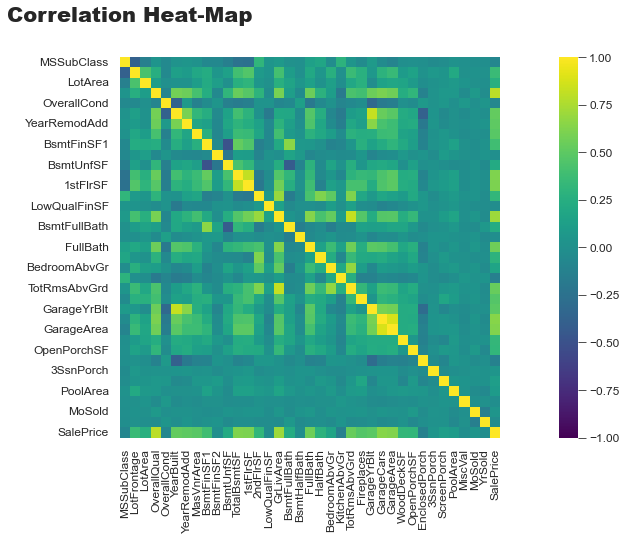

In [54]:
# correlation of all features
sns.heatmap(data.corr(), vmin = -1, vmax = 1, cmap = "viridis", square = True)

plt.suptitle("Correlation Heat-Map")
plt.show()

In [95]:
THRESHOLD = 0.57 # tau value

In [96]:
corr = data.corr() # correlation of all numeric variables

In [97]:
arr = corr.values # convert to `numpy` for filtering
arr = np.round(np.where((arr >= THRESHOLD) | (arr <= -THRESHOLD), arr, np.nan), 3)

In [79]:
arr

array([[ 1., nan, nan, ..., nan, nan, nan],
       [nan,  1., nan, ..., nan, nan, nan],
       [nan, nan,  1., ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ...,  1., nan, nan],
       [nan, nan, nan, ..., nan,  1., nan],
       [nan, nan, nan, ..., nan, nan,  1.]])

In [98]:
corr_filtered = pd.DataFrame(arr, columns = corr.columns, index = corr.index) # filtered based on threshold

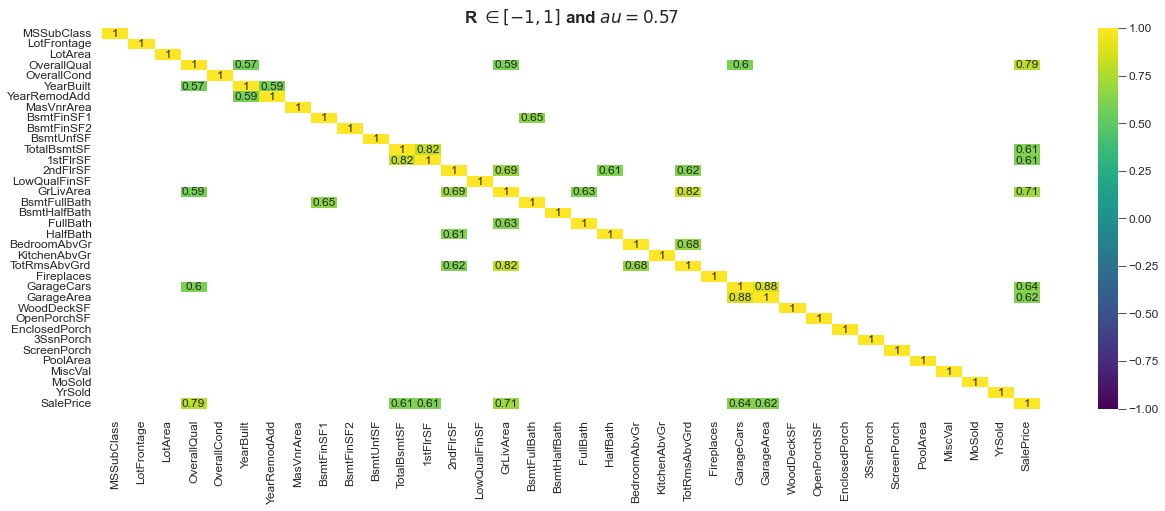

In [87]:
sns.heatmap(corr_filtered, vmin = -1, vmax = 1, cmap = "viridis", annot = True, xticklabels = True, yticklabels = True)

plt.title(f"R $\in [-1, 1]$ and $\tau = {THRESHOLD}$")
plt.show()

**Observations** On defining $\pm \tau$ we can now clearly identify which values have a relationship. Inference from heatmap are:
  * There are no features which have a significantly high negative correlation.
  * **`SalePrice`** shares a moderately high positive relationship with `OverallQual` and `GrLivArea`.
  * `YearBuilt` and `GarageYrBlt` has a high correlation, and that is almost expected. We can even consider *dropping* one feature. Infact about 74.6% of the two value are same (check below).
  * Another strongly correlated feature is `GarageCars` and `GarageArea`. Obviously, large garage area meaning more amount of cars. So here again we can discard any one - discarding `GarageArea` as it has a slightly lower correlation with `SalePrice`.
  * Similarly, among `GrLivArea` and `TotRmsAbvGrd` we are discarding `TotRmsAbvGrd`.
  * `TotalBsmtSF` also has a very high positive correlation with `1stFlrSF`. Even if we look at the distribution, it is almost same. Thus, for this we are discarding `1stFlrSF`.
  
In addition, let's also find out the top `K` features which have correlation with `SalePrice` i.e. our target variable, using the `nlargest()` function.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


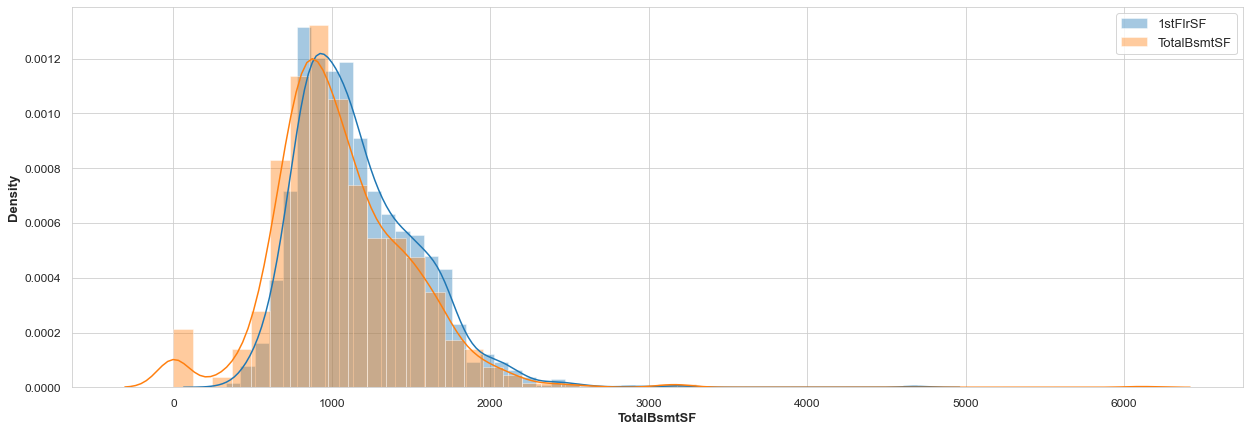

In [90]:
sns.distplot(data["1stFlrSF"], label = "1stFlrSF")
sns.distplot(data["TotalBsmtSF"], label = "TotalBsmtSF")

plt.legend()
plt.show()

In [69]:
K = 10 # returns (K -1) features

In [70]:
cols = corr.nlargest(10, "SalePrice")["SalePrice"].index # columns with observed highest correlation
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

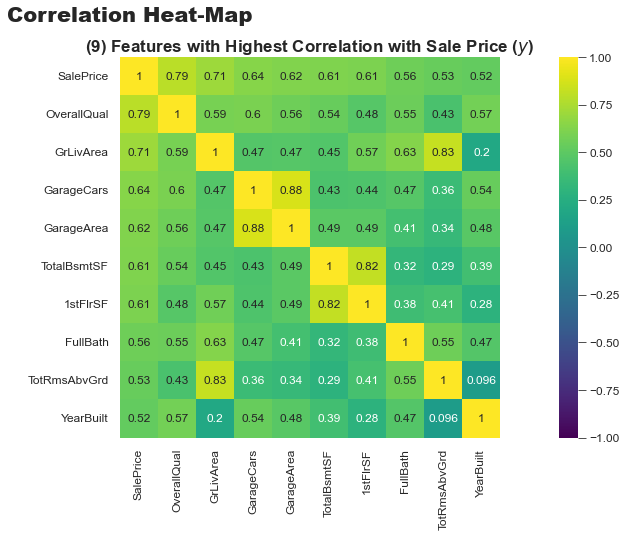

In [75]:
# correlation of all features
sns.heatmap(data[cols].corr(), vmin = -1, vmax = 1, cmap = "viridis", square = True, annot = True)

plt.suptitle("Correlation Heat-Map")
plt.title(f"({K -1}) Features with Highest Correlation with Sale Price ($y$)")
plt.show()

In [64]:
data[["YearBuilt", "GarageYrBlt"]].apply(lambda x : np.equal(*x), axis = 1).value_counts()

True     1089
False     371
dtype: int64

In [102]:
DISCARDED_FEATURES = ["GarageYrBlt", "GarageArea", "TotRmsAbvGrd", "1stFlrSF"]

In [99]:
# based on observation, removing excess column
# not to remove `area` as it might require some further analysis
data.drop(columns = DISCARDED_FEATURES, inplace = True)
data.shape

(1460, 71)

In [104]:
# update cols such that discarded features are not present
cols = [c for c in cols if c not in DISCARDED_FEATURES]
cols

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt']

#### Pairplots

Let's understand the relationship of numerical variable against each other (and also with categorical variables) using `sns.pairplot`. By default, the function plots the pair-wise relationship between numerical variables, but using some advanced `PairGrid` functionality, we will control to make more sense about the data.

The dataset has the following `numeric` columns (on the original dataset, before removing null columns):

```python
li = data.select_dtypes(include = np.number).columns.tolist()

print(len(li), li)
>> 37 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
```

Okay, so this poses a challenge as plotting `37` variable pairplot is meaningless. Let's divide and select some columns and repeat the exercise to get a better understanding. But first, let's create a `for`-loop to plot `6` features against `SalePrice`. Based on relevance, we can then select a *sub-list* of important features for further analysis.

In [67]:
li = data.select_dtypes(include = np.number).columns.tolist()[:-1] # last column is `SalePrice`

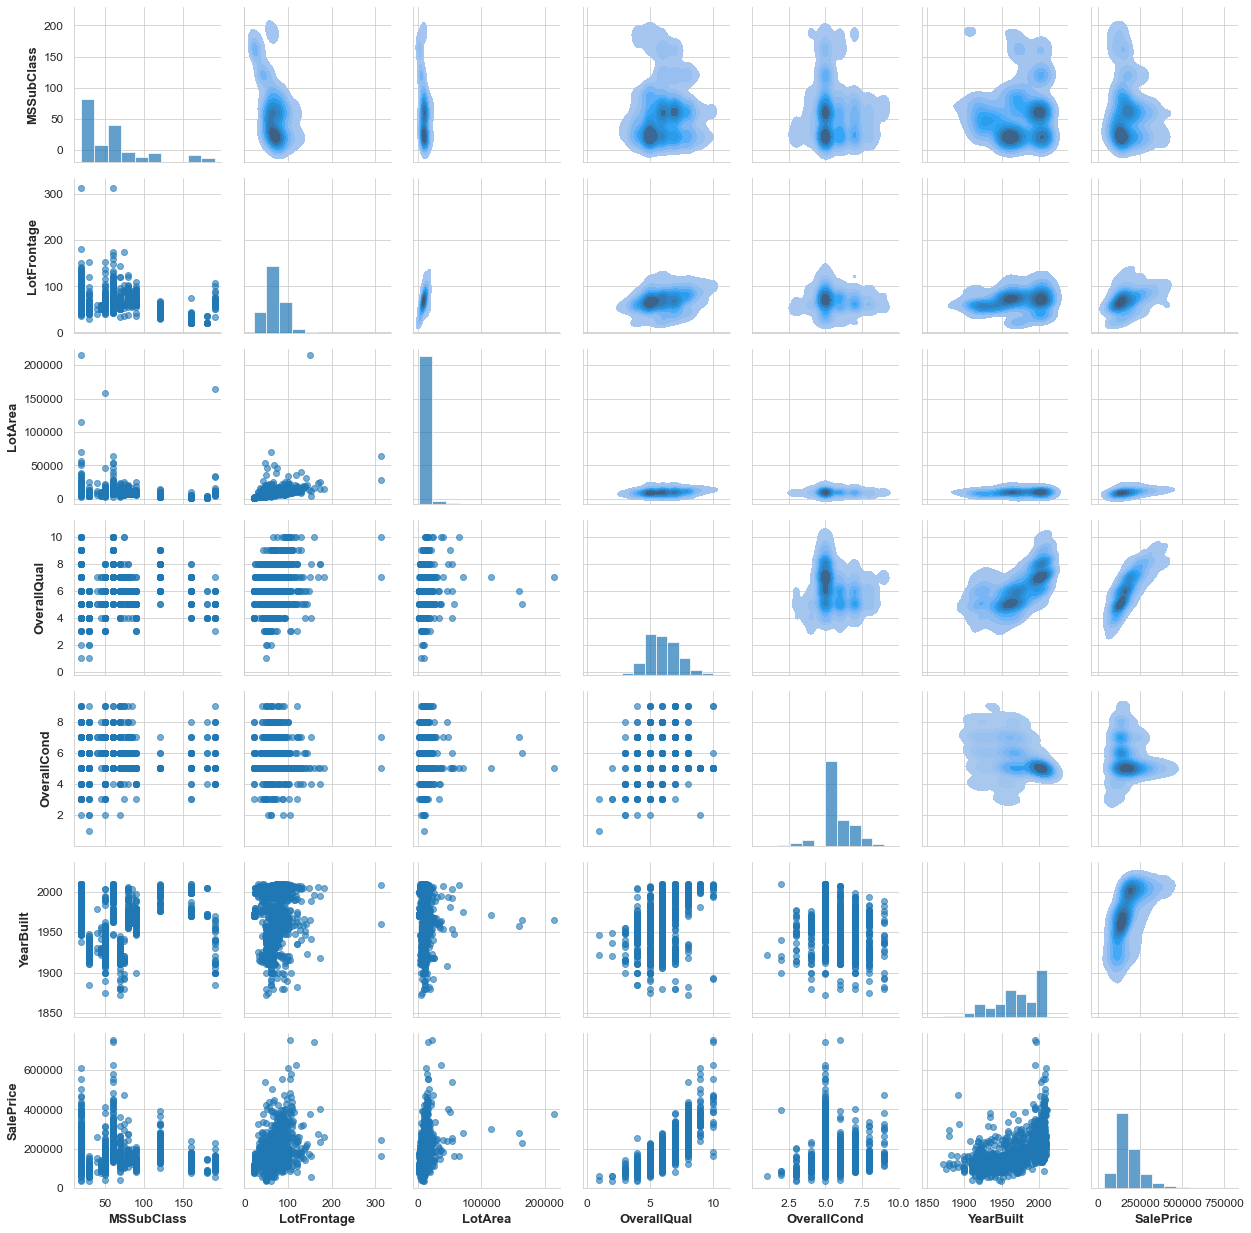

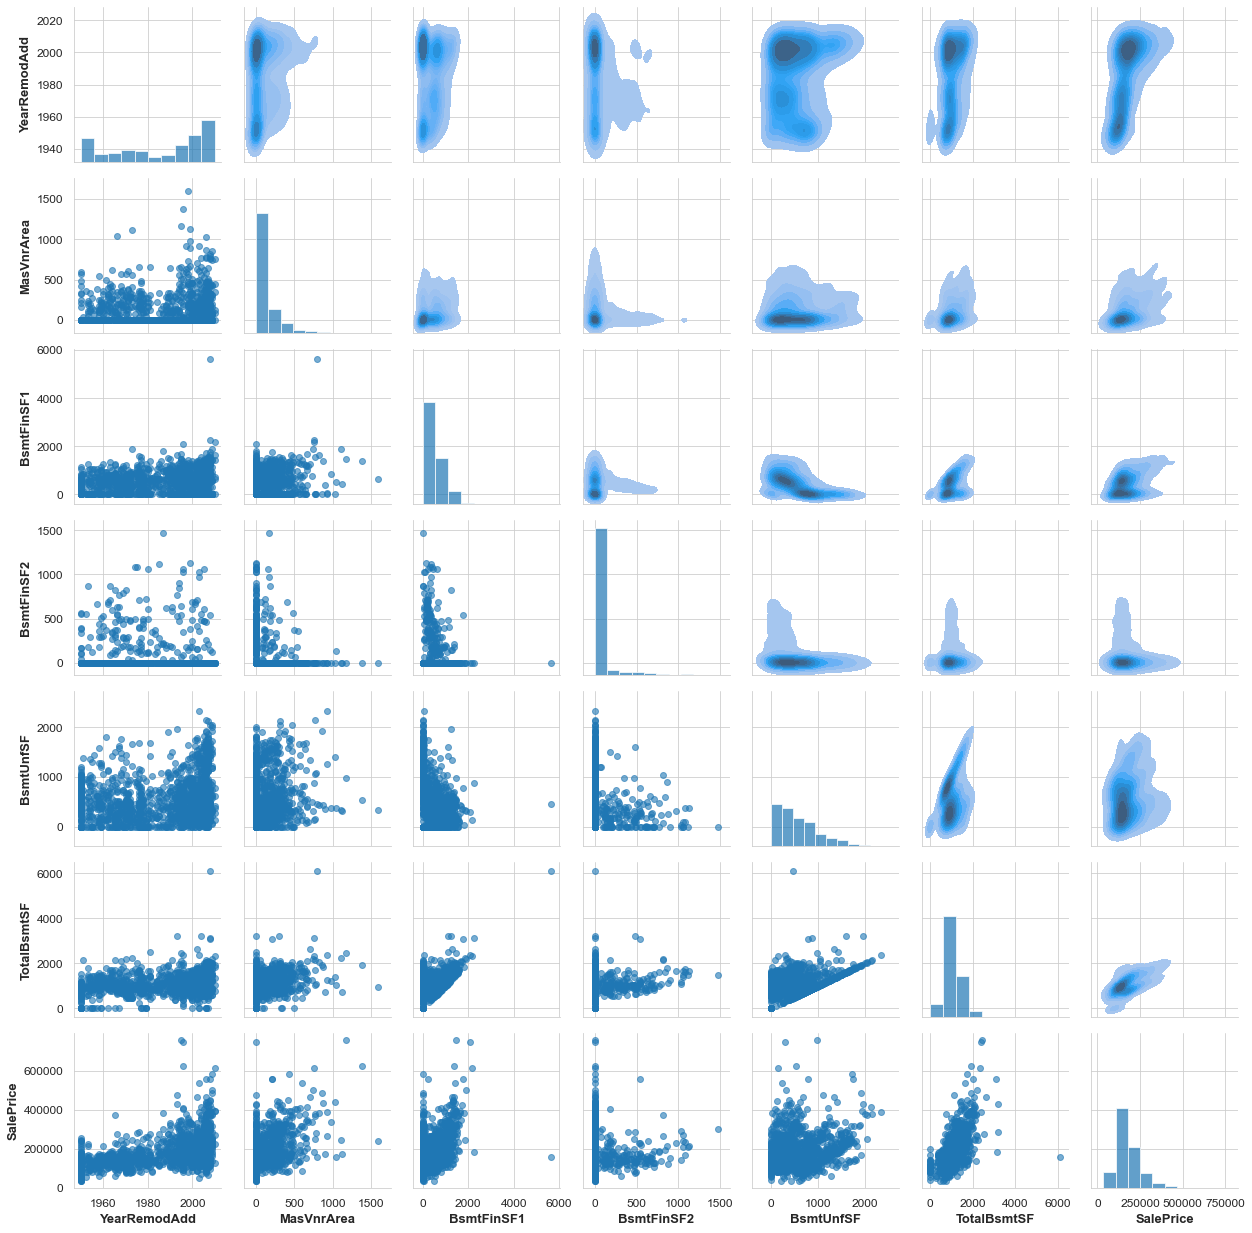

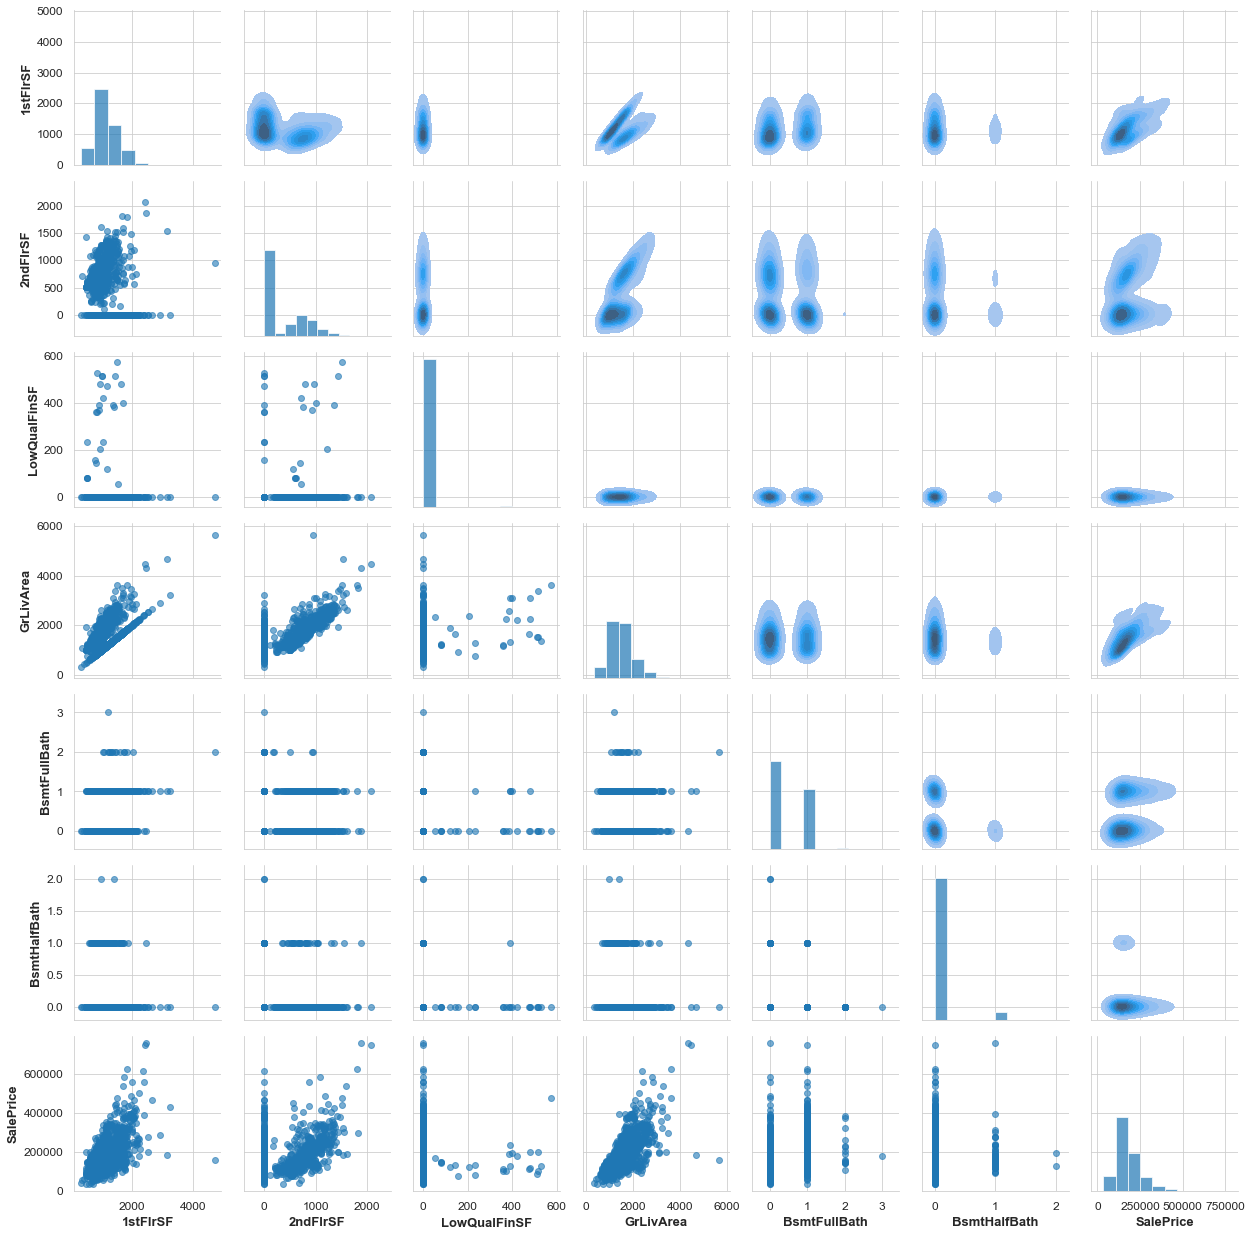

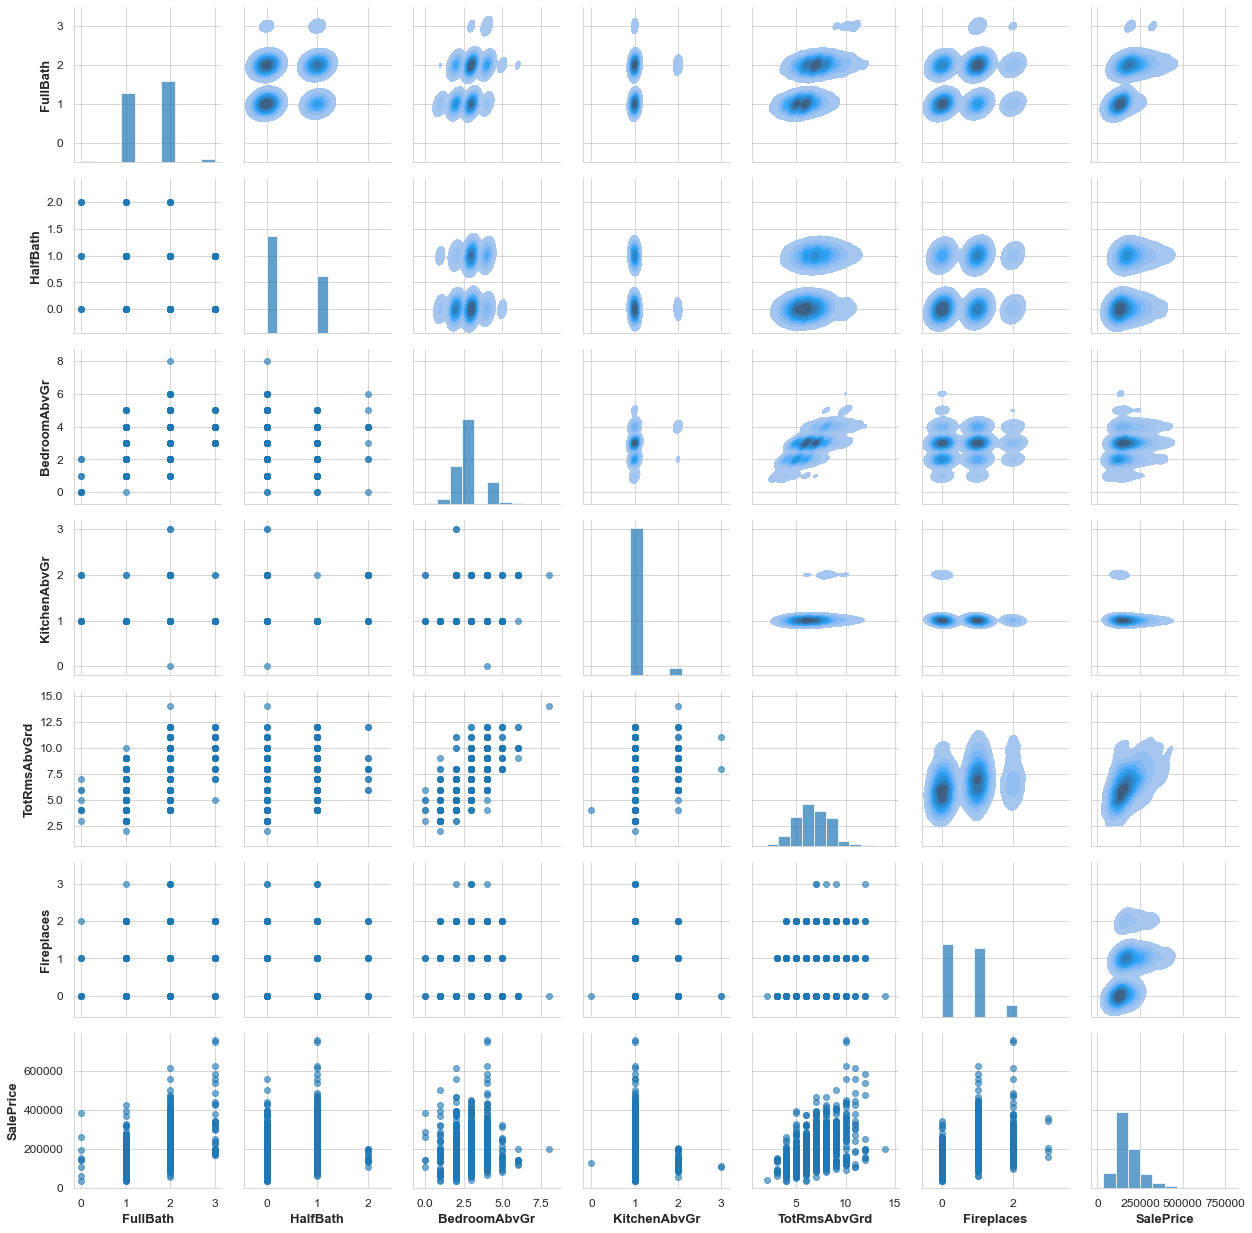

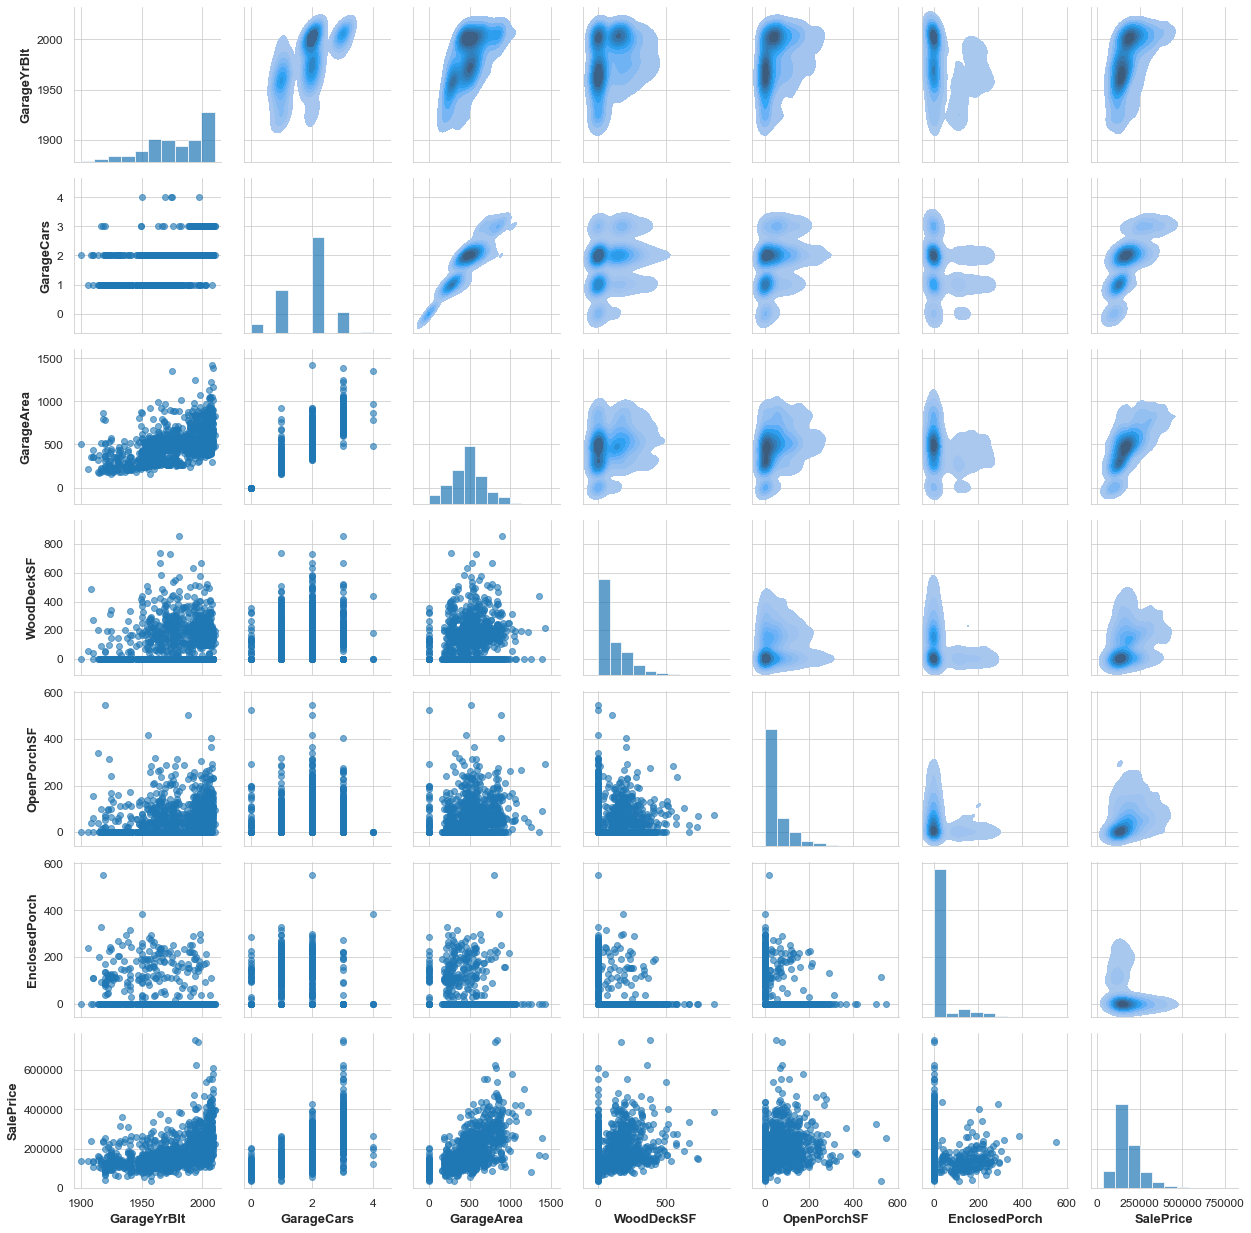

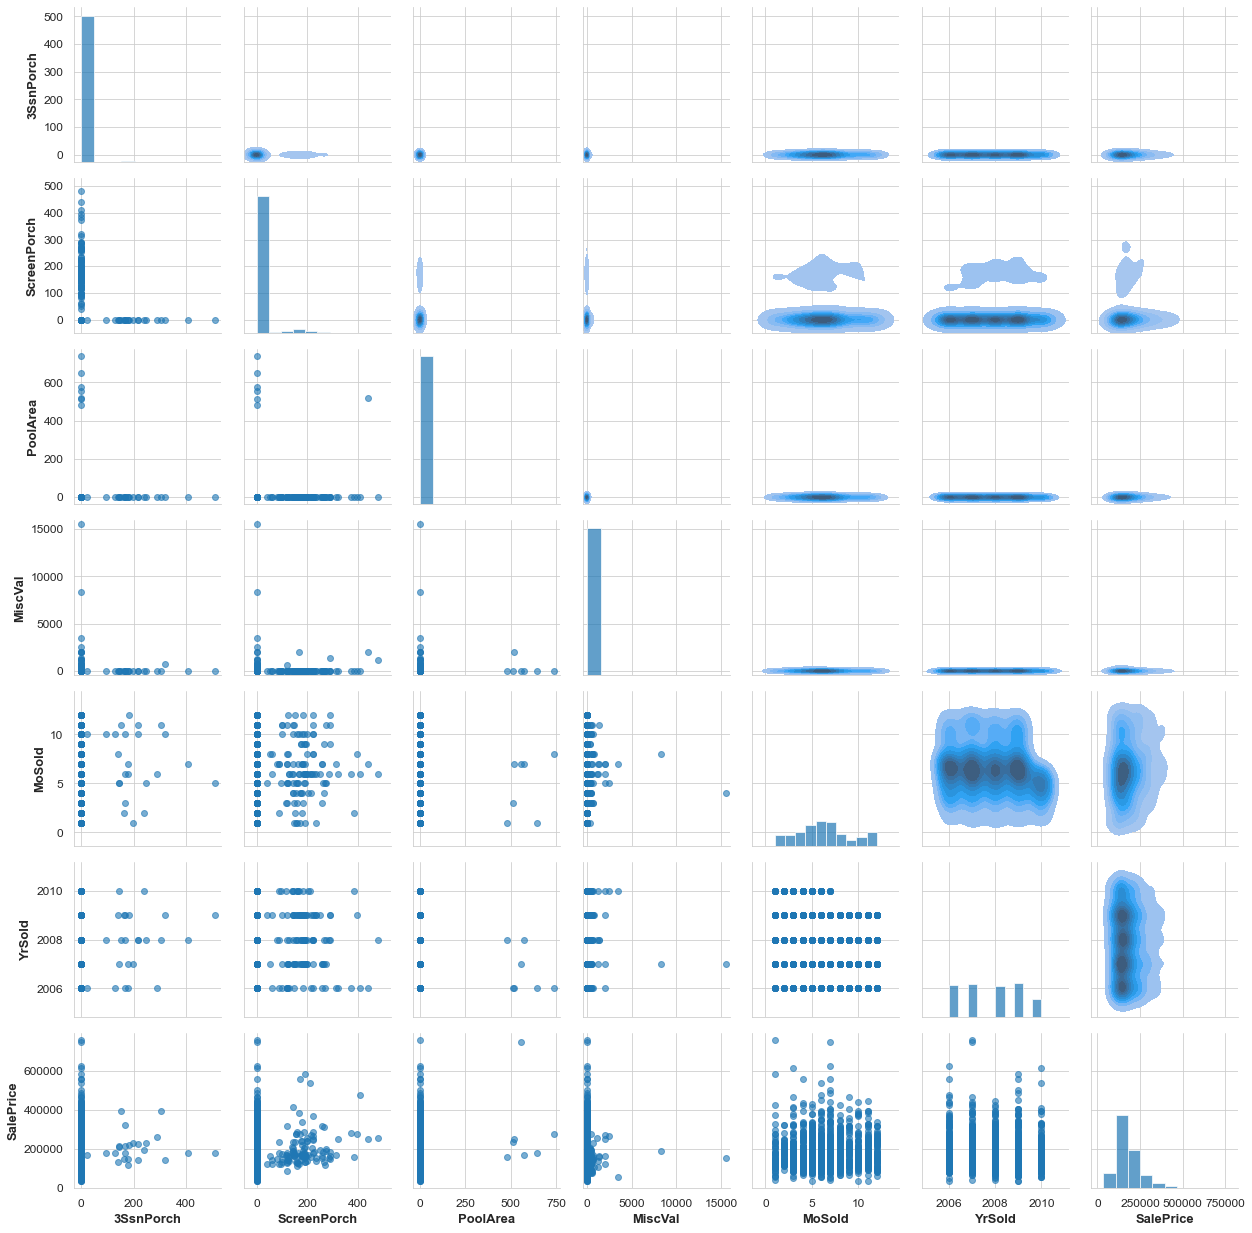

In [132]:
arange = np.arange(0, len(li) + 1, 6)
for s, e in zip(arange[:-1], arange[1:]):
    # create a `PairGrid` object mapper
    g = sns.PairGrid(data[li[s:e] + ['SalePrice']]) # select subsequent columns
    
    # set `PairGrid` objects along each given axis
    g.map_diag(plt.hist, alpha = 0.7) # on diagonals
    g.map_lower(plt.scatter, alpha = 0.6)
    g.map_upper(sns.kdeplot, shade = True)
    
plt.show()

Before moving forward, for each *categorical* variables, find the number of unique values.

In [110]:
data.select_dtypes(include = object).columns.tolist()

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [105]:
data[cols]

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
Id,,,,,,,
1,208500,7,1710,2,856,2,2003
2,181500,6,1262,2,1262,2,1976
3,223500,7,1786,2,920,2,2001
4,140000,7,1717,3,756,1,1915
5,250000,8,2198,3,1145,2,2000
...,...,...,...,...,...,...,...
1456,175000,6,1647,2,953,2,1999
1457,210000,6,2073,2,1542,2,1978
1458,266500,7,2340,1,1152,2,1941


### Missing Data

## Reference

 * <a id = "mm-lib" href = "https://libanswers.lib.miamioh.edu/stats-faq/faq/343640">What are the advantages of the normal distribution?</a>
 * <a id = "itl-nist-gov" href = "https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm">Measures of Skewness and Kurtosis</a>
 * <a id = "pearsonsR" href = "https://www.youtube.com/watch?v=2B_UW-RweSE&ab_channel=statslectures">Pearson's R Correlation</a>
 * <a id = "r-p-value" href = "https://www.youtube.com/watch?v=xZ_z8KWkhXE&ab_channel=StatQuestwithJoshStarmer">Pearson's Correlation, Clearly Explained!!!</a>